<a href="https://colab.research.google.com/github/miguelsmachado/machine_learning/blob/master/Introdu%C3%A7%C3%A3o_a_Algoritimos_n%C3%A3o_Supervisionados_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Trabalhando com o DataSet

Importando os dados

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv")

filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Antes de começarmos a trabalhar com esse DataSet, precisamos fazer alguns ajustes na coluna `genres`.

Precisamos separar os dados. Para isso, utilizaremos o método `get_dummies()`


In [3]:
# podemos usar isso de 2 formas:
# Series.str.get_dummies() -> Onde temos como único parâmetro sep="|"
# ou
# pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False,
#                columns=None, sparse=False, drop_first=False, dtype=None))

# Vamos optar pela primeira opcão pois precisamos settar um separador

genres = filmes.genres.str.get_dummies()
genres

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Aprofundando um pouco sobre o `get_dummies()`

Vamos nos desviar um pouco do nosso caminho para entendermos um pouco melhor o que é o *get_dummies()*

#### Label Encoding

Vamos supor que temos um data set que tenha como variável indepente algumas cores:

In [4]:
dados = {
    "parametro_1": [4.3, 3.9, 7.2, 8.4, 5.5, 6.7],
    "parametro_2": [5.9, 3.5, 11.9, 4.2, 9.9, 12.9],
    "parametro_3": [4.1, 5.4, 9.3, 12.1, 14.3, 3.9],
    "cor": ["verde", "vermelho", "amarelo", "amarelo", "verde", "verde"],
    "resultado_da_amostra":[0,0,1,1,0,1]
}

df = pd.DataFrame(dados)
df

,parametro_1,parametro_2,parametro_3,cor,resultado_da_amostra
0,4.3,5.9,4.1,verde,0
1,3.9,3.5,5.4,vermelho,0
2,7.2,11.9,9.3,amarelo,1
3,8.4,4.2,12.1,amarelo,1
4,5.5,9.9,14.3,verde,0
5,6.7,12.9,3.9,verde,1


Como sabemos, não podemos rodar um modelo de ML com variáveis indendentes como strings. Desse forma, utilizando o Label Encoding, vamos substituir as cores por valores (1, 2, 3)

In [5]:
troca = {
    "verde":1,
    "amarelo":2,
    "vermelho":3
}

df.cor = df.cor.map(troca)

df

,parametro_1,parametro_2,parametro_3,cor,resultado_da_amostra
0,4.3,5.9,4.1,1,0
1,3.9,3.5,5.4,3,0
2,7.2,11.9,9.3,2,1
3,8.4,4.2,12.1,2,1
4,5.5,9.9,14.3,1,0
5,6.7,12.9,3.9,1,1


Aparentemente, está tudo pronto para rodar o modelo.

Antes de rodar, vamos fazer uma pausa e analisar o que está acontecendo.

Ao substituirmos por valores inteiros, podemos confudir nosso modelo pois ele pode assumir que:

- vermelho > amarelo > verde, pois 3>2>1;
- verde + amarelo = vermelho, pois 1 + 2 = 3;
- etc...

Dessa forma, vimos que o Label Encoding, nem sempre é a melhor maneira de realizar essa substituição. Vamos dar uma olhada no `One-hot-encoding`

#### One-hot-encoding

Aplicando one-hot-encoding, as categorias se transformaram em colunas (variáveis) onde o número 1 representa o valor afirmativo e o 0 negativo.

Vamos fazer na prática para entendermos melhor:

In [6]:
dados = {
    "parametro_1": [4.3, 3.9, 7.2, 8.4, 5.5, 6.7],
    "parametro_2": [5.9, 3.5, 11.9, 4.2, 9.9, 12.9],
    "parametro_3": [4.1, 5.4, 9.3, 12.1, 14.3, 3.9],
    "cor": ["verde", "vermelho", "amarelo", "amarelo", "verde", "verde"],
    "resultado_da_amostra":[0,0,1,1,0,1]
}

df = pd.DataFrame(dados)
df

,parametro_1,parametro_2,parametro_3,cor,resultado_da_amostra
0,4.3,5.9,4.1,verde,0
1,3.9,3.5,5.4,vermelho,0
2,7.2,11.9,9.3,amarelo,1
3,8.4,4.2,12.1,amarelo,1
4,5.5,9.9,14.3,verde,0
5,6.7,12.9,3.9,verde,1


In [7]:
pd.get_dummies(df, columns=['cor'])

,parametro_1,parametro_2,parametro_3,resultado_da_amostra,cor_amarelo,cor_verde,cor_vermelho
0,4.3,5.9,4.1,0,0,1,0
1,3.9,3.5,5.4,0,0,0,1
2,7.2,11.9,9.3,1,1,0,0
3,8.4,4.2,12.1,1,1,0,0
4,5.5,9.9,14.3,0,0,1,0
5,6.7,12.9,3.9,1,0,1,0


Apesar do DataSet ter ficado um pouco maior, para a máquina tudo fica muito mais comprensível, pois o que ele entende é:

- É vermelho? Sim ou Não (1 ou 0)
- É amarelo? Sim ou Não (1 ou 0)
- É verde? Sim ou Não (1 ou 0)

Ótimo! Tudo está muito melhor, mas....

Ainda temos um problema, dessa forma, estamos sendo redundantes nos dados.

Não precisamos das 3 colunas de cores para que o modelo seja compreendido:

- Se a amostra não é vermelha e nem verde, lógico que ela é amarela;
- Se a amostra não é verde e nem amarela, lógico que ela é vermelha; e
- Se a amostra não é vermelha e nem amarela, lógico que ela é verde

Dessa forma, podemos (e devemos) eliminar uma coluna, das 3 geradas. E a boa notícia é que o `get_dummies()` já tem esse parâmetro: `drop_first=`

In [8]:
pd.get_dummies(df, columns=['cor'], drop_first=True)

,parametro_1,parametro_2,parametro_3,resultado_da_amostra,cor_verde,cor_vermelho
0,4.3,5.9,4.1,0,1,0
1,3.9,3.5,5.4,0,0,1
2,7.2,11.9,9.3,1,0,0
3,8.4,4.2,12.1,1,0,0
4,5.5,9.9,14.3,0,1,0
5,6.7,12.9,3.9,1,1,0


Por essa razão, o `get_dummies()` é a melhor opção para trabalharmos com variáveis quantitativas

## Utilizando o `StandartScaler()`

Após esse pequeno desvio para entendermos melhor o `get_dummies()`, vamos voltar para a proposta inicial.

Vamos utilizar o `StandardScaler()` para colocar pelos nos generos dos filmes e assim, podermos saber qual é mais marcante em cada filme:

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

generos_escalados = scaler.fit_transform(genres)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

Vamos dar uma olhada melhor no que foi gerado, olhando o primeiro item dessa lista:

In [11]:
generos_escalados[0]

array([-0.05917995, -0.48060698,  2.59101927,  3.86579274,  3.69752441,
        1.26242494, -0.37463158, -0.21748944, -0.90024672,  3.3920166 ,
       -0.09492563, -0.3340552 , -0.12839708, -0.18841895, -0.24998637,
       -0.44263346, -0.33443476, -0.49125897, -0.20201972, -0.13206534])

Cada gênero ganhou um peso, de acordo com o que o classificador achou que deveria. Como temos 20 gêneros, também temos 20 pesos.

## Utilizando o `KMeans()`

Antes de utilizar, vamos entender o que é o KMeans:

- K-Means é um algoritmo de clusterização (ou agrupamento) disponível na biblioteca Scikit-Learn.
- É um algoritmo de aprendizado não supervisionado que avalia e clusteriza os dados de acordo com suas características.

Ou seja, o KMeans vai pegar todas as 9742 entradas dos DataSet de filmes, avaliar os 20 pesos que foram dados para os generos dos filmes e agrupar os filmes de acordo com o número de grupos que pedirmos para ele.

Vamos ver na prática:

In [12]:
from sklearn.cluster import KMeans

Vamos, inicialmente, trabalhar com 3 clusters

In [13]:
modelo = KMeans(n_clusters=3, random_state=42)

modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Vamos agora verificar como o KMeans agrupou filmes:

In [14]:
# modelo.labels_ devolve uma array com o cluster que cada entrada está
modelo.labels_

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [15]:
filmes['labels_kmeans'] = modelo.labels_
filmes.head(10)

,movieId,title,genres,labels_kmeans
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0
4,5,Father of the Bride Part II (1995),Comedy,0
5,6,Heat (1995),Action|Crime|Thriller,2
6,7,Sabrina (1995),Comedy|Romance,0
7,8,Tom and Huck (1995),Adventure|Children,1
8,9,Sudden Death (1995),Action,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,1


Podemos ver claramente que a classificação tem algum sentido muito lógico!

#### O que são centróides?

Um centróide é em qual posição dos eixos existentes encontra-se o centro do grupo (cluster) definido pelo KMeans.

Se fossem apenas 2 variáveis independentes, poderiamos facilmente entender o que acontece pois esses centros seriam plotados no eixo X Y, conforme na figura abaixo:

<center><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_digits_001.png"></center>

Vale muito a pena conferir o site a seguir para ver exatamente como funciona o cálculo do centróide. Como ele é criado de forma aleatória e depois os centros vão se deslicando até minimizar ao máximo o *Mean square point-centroid distance*

[Visualizing K-Means Clustering - Stanford](https://stanford.edu/class/engr108/visualizations/kmeans/kmeans.html)

Conforme foi dito antes, se fossem 2 parâmetros, teriamos uma posição *x* e uma *y* para o centróide, pois estariamos trabalhando com $\mathbb{R}$$^2$.

Mas aqui estamos trabalhando em $\mathbb{R}$$^2$$^0$! 
Ou seja, temos 20 posições para cada um dos 3 centróides gerados!

Vamos visualizar essas posições! 

**Lembrando que é impossível de representar graficamente dimensões acima de $\mathbb{R}$$^3$**

In [16]:
for i in range(modelo.n_clusters):
  centroides = zip(genres.columns, modelo.cluster_centers_[i])
  print(f"Centróide {i+1}:")
  for centroide in centroides:
    print(centroide)
  print()

Centróide 1:
('(no genres listed)', 0.037165481661846175)
('Action', -0.3196691022330024)
('Adventure', -0.2964006730359063)
('Animation', -0.22008115603968129)
('Children', -0.1822592517363608)
('Comedy', 0.2492262878153281)
('Crime', -0.2749309734716544)
('Documentary', 0.1333662519717078)
('Drama', 0.10225529622846001)
('Fantasy', -0.18144489233467553)
('Film-Noir', -0.0895966750908176)
('Horror', -0.10828742518170681)
('IMAX', -0.11252127008080996)
('Musical', 0.022814401052937177)
('Mystery', -0.21944512442741504)
('Romance', 0.1894812974559126)
('Sci-Fi', -0.19443012581420302)
('Thriller', -0.48661403033084444)
('War', 0.06057547791067728)
('Western', 0.028865372590740006)

Centróide 2:
('(no genres listed)', -0.059179947382784155)
('Action', 0.7670320941606383)
('Adventure', 1.62764502989453)
('Animation', 1.25791770235326)
('Children', 1.1455292257020557)
('Comedy', -0.13422387212942335)
('Crime', -0.30648410601987164)
('Documentary', -0.21095563336987996)
('Drama', -0.58098859

Para facilitar nosso entendimento vamos dizer que os centróides do KMeans são os "pesos" que cada genero teve na hora de separar os grupo (clusters).

Sendo assim, uma boa forma de visualizar que foi mais significativo na divisão é fazendo um plot:

In [17]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=genres.columns)
grupos = grupos.transpose()

grupos

,0,1,2
(no genres listed),0.037165,-0.059180,-0.059180
Action,-0.319669,0.767032,0.342511
Adventure,-0.296401,1.627645,-0.273856
Animation,-0.220081,1.257918,-0.235204
Children,-0.182259,1.145529,-0.261765
Comedy,0.249226,-0.134224,-0.566342
Crime,-0.274931,-0.306484,0.918102
Documentary,0.133366,-0.210956,-0.213273
Drama,0.102255,-0.580989,0.107041
Fantasy,-0.181445,0.995830,-0.167288


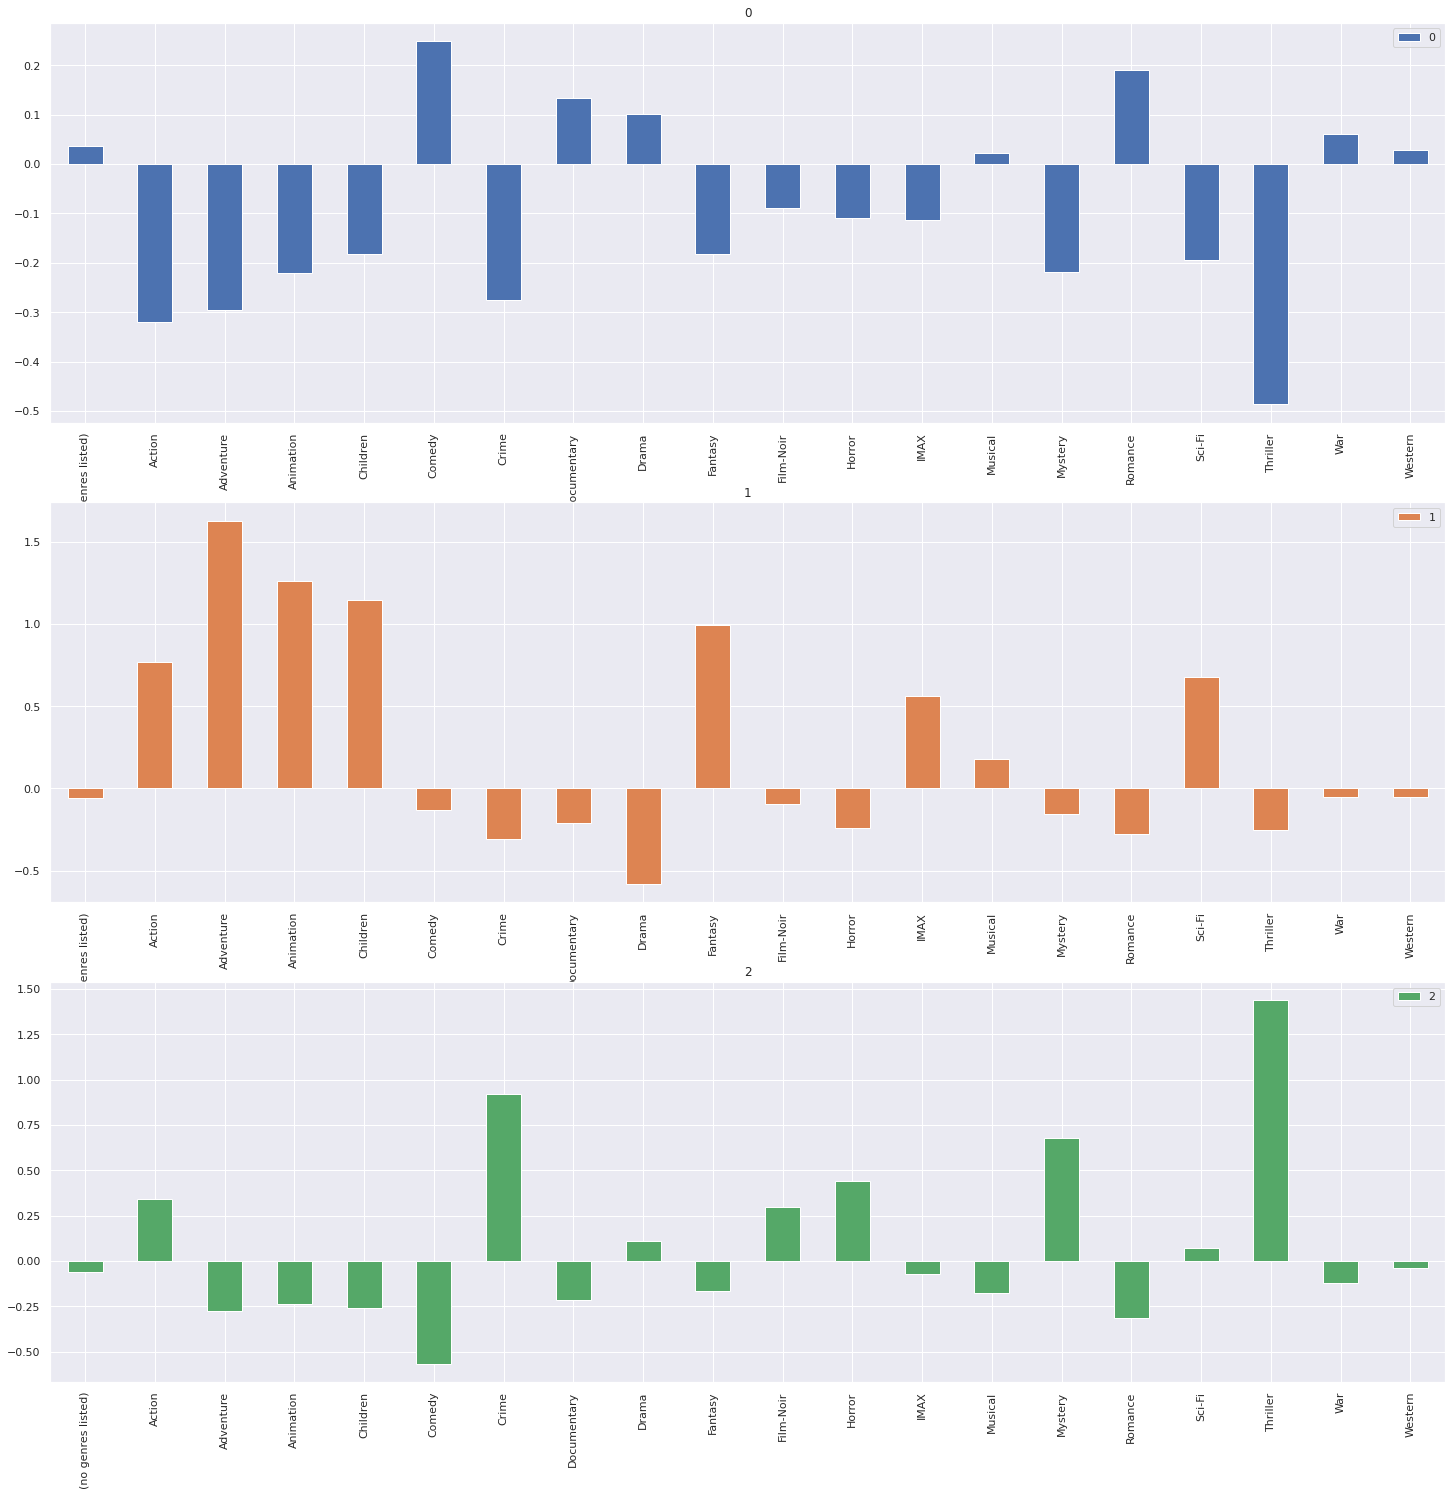

In [47]:
# subplots gera cada uma das colunas em subplots separados
# figsize é relativo ao tamanho da figura
# sharex é o compartilhamento de um eixo X para todos os gráficos

grupos.plot.bar(subplots=True, figsize=(25, 25), sharex=False);

Gráficamente fica muito mais fácil de visualizar o que está acontecendo!
De uma forma geral, podemos dizer que:

- 1º Cluster -> Comédias Romanticas
- 2º Cluster -> Filmes Infantis e de Ação
- 3º Cluster -> Mistérios, Crimes e Assassinatos

Vamos conferir melhor olhando alguns filmes de cada cluster:

In [19]:
grupo = 0
filtro = modelo.labels_ == grupo

filmes[filtro].sample(10)

,movieId,title,genres,labels_kmeans
3843,5397,Monkey Business (1952),Comedy|Sci-Fi,0
2985,3998,Proof of Life (2000),Drama,0
8568,116738,DeadHeads (2011),Adventure|Comedy|Horror,0
5938,34162,Wedding Crashers (2005),Comedy|Romance,0
4384,6428,Two Mules for Sister Sara (1970),Comedy|War|Western,0
7846,93512,"Jeff, Who Lives at Home (2012)",Comedy|Drama,0
1233,1642,Indian Summer (a.k.a. Alive & Kicking) (1996),Comedy|Drama,0
435,499,Mr. Wonderful (1993),Comedy|Romance,0
9562,173535,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),0
2081,2765,"Acid House, The (1998)",Comedy|Drama,0


In [20]:
grupo = 1
filtro = modelo.labels_ == grupo

filmes[filtro].sample(10)

,movieId,title,genres,labels_kmeans
6411,51024,The Odyssey (1997),Adventure|Drama|Fantasy,1
8986,138966,Nasu: Summer in Andalusia (2003),Animation,1
8140,101962,Wolf Children (Okami kodomo no ame to yuki) (2...,Animation|Fantasy,1
7395,79702,Scott Pilgrim vs. the World (2010),Action|Comedy|Fantasy|Musical|Romance,1
2174,2890,Three Kings (1999),Action|Adventure|Comedy|Drama|War,1
5949,34334,Stealth (2005),Action|Adventure|Sci-Fi|Thriller,1
1553,2090,"Rescuers, The (1977)",Adventure|Animation|Children|Crime|Drama,1
9484,169982,Power Rangers (2017),Action|Adventure|Sci-Fi,1
9546,172875,A Detective Story (2003),Animation|Sci-Fi,1
9394,164226,Maximum Ride (2016),Action|Adventure|Comedy|Fantasy|Sci-Fi|Thriller,1


In [21]:
grupo = 2
filtro = modelo.labels_ == grupo

filmes[filtro].sample(10)

,movieId,title,genres,labels_kmeans
9063,142366,Cigarette Burns (2005),Horror|Thriller,2
9529,172229,Plain Clothes (1988),Comedy|Mystery|Romance|Thriller,2
4701,7017,Passenger 57 (1992),Action|Thriller,2
9342,160836,Hazard (2005),Action|Drama|Thriller,2
3411,4640,Brother (2000),Action|Crime|Thriller,2
1579,2118,"Dead Zone, The (1983)",Thriller,2
3052,4086,"Big Easy, The (1987)",Action|Crime|Mystery|Romance|Thriller,2
5657,27549,Dead or Alive: Final (2002),Comedy|Crime|Drama|Sci-Fi|Thriller,2
6590,55278,Sleuth (2007),Drama|Mystery|Thriller,2
7187,72405,Bad Lieutenant: Port of Call New Orleans (2009),Crime|Drama,2


Vamos também plotar os filmes em um gráfico de 2 dimensões para vermos o agrupamento do KMeans:

Mas antes, temos que resolver um pequeno problema. Nossos dados estão em 20 dimensões! Como reduzir de 20 dimensões para 2? E assim conseguir representar graficamente:

Existem algumas ferramentas que reduzem a dimensionalidade dos dados, mantendo somente as informações mais relevantes e importantes.

Em nosso exemplo, vamos usar o `TSNE`:

In [22]:
from sklearn.manifold import TSNE

In [23]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ -7.1418962 , -67.23952   ],
       [-60.726257  ,   5.7766256 ],
       [ 25.799362  ,   9.508905  ],
       ...,
       [  3.8742158 , -17.457718  ],
       [  8.195933  , -41.629448  ],
       [ -0.46251583,  18.012552  ]], dtype=float32)

Realizando o plot

In [24]:
import seaborn as sns

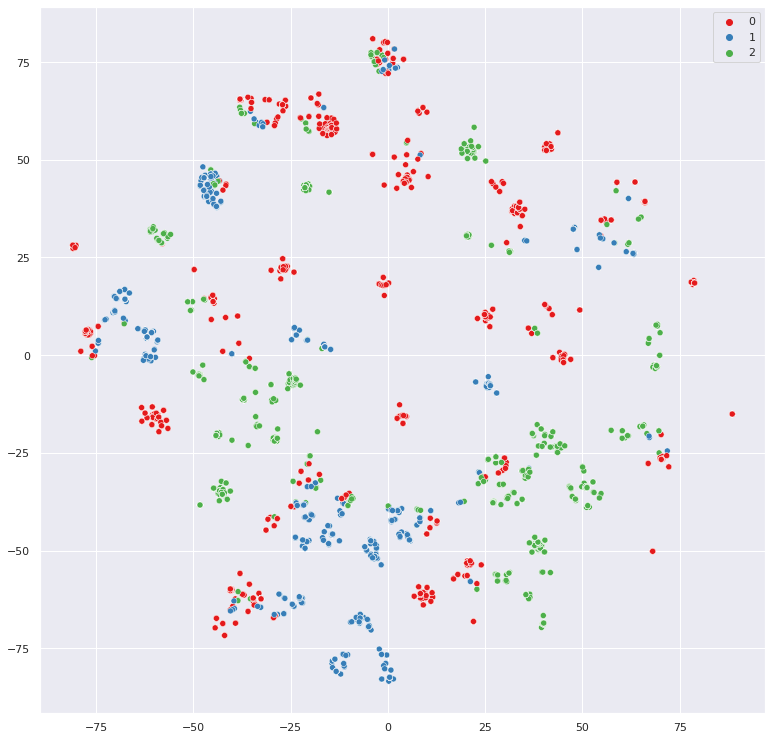

In [25]:
# o parâmetro hue separa os dados por cor. Nesso caso, estamos separando com o array 
# modelo.labels_, que contém qual foi a classificação de cada dado
ax = sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=modelo.labels_, palette=('Set1'))
ax.figure.set_size_inches(13, 13)

Inicialmente, ao olharmos para imagem, tudo pode parecer um pouco sem sentido e de certa forma mal feito, pois os grupamento não estão perfeitos.

Mas vamos lembrar que tinhamos 20 caracteristicas que foram utilizadas para criar o modelo e reduzimos para apenas 2 para fazer o plot. Com certeza tem muita coisa nessa gráfica que não conseguimos ver por causa dessa perda de informações

## Quantos centróides devemos usar?

Nos exemplos acima, utilizamos 3 centróides, o que nos gerou 3 clusters.

Mas e ai? Qual o número correto para termos um melhor aproveitamento do nosso modelo?

### Criando 20 clusters

In [27]:
from sklearn.cluster import k_means

In [29]:
modelo_20 = KMeans(n_clusters=20, random_state=42)

modelo_20.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [30]:
modelo_20.labels_

array([ 9,  7,  2, ...,  0, 17,  2], dtype=int32)

In [32]:
filmes['20labels_kmeans'] = modelo_20.labels_

filmes

,movieId,title,genres,labels_kmeans,20labels_kmeans
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,9
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,7
2,3,Grumpier Old Men (1995),Comedy|Romance,0,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,18
4,5,Father of the Bride Part II (1995),Comedy,0,2
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,17
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,17
9739,193585,Flint (2017),Drama,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,17


In [38]:
grupos_20 = pd.DataFrame(modelo_20.cluster_centers_, columns=genres.columns)
grupos_20 = grupos_20.transpose()

grupos_20

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
(no genres listed),-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,16.897616,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180
Action,-0.368538,-0.456038,-0.327298,-0.333405,2.080702,-0.440080,0.429704,0.186035,0.404605,-0.167223,0.128485,-0.480607,-0.156005,-0.268637,1.026999,-0.480607,1.887396,0.426134,-0.459023,1.348900
Adventure,-0.299812,-0.357392,-0.292246,-0.317512,-0.140687,-0.027959,-0.379377,0.898633,0.035718,0.951936,0.249380,-0.385949,-0.268049,-0.350020,1.121377,-0.287627,1.130620,0.515834,-0.293964,2.591019
Animation,-0.258679,-0.238898,-0.258679,-0.163864,-0.235245,0.563605,-0.258679,-0.258679,-0.211943,1.905456,-0.183231,-0.258679,-0.226010,-0.258679,0.628865,-0.258679,-0.258679,3.865793,-0.258679,-0.258679
Children,-0.270451,-0.260936,-0.270451,-0.270451,-0.270451,0.721543,-0.261692,0.635479,-0.259210,3.697524,-0.125281,-0.270451,-0.215450,-0.270451,0.482962,-0.263171,-0.270451,-0.270451,-0.264878,-0.035891
Comedy,-0.779077,-0.599974,1.262425,-0.744895,-0.185100,0.248153,-0.388473,0.150716,-0.466192,0.450273,-0.303544,-0.792126,-0.515474,-0.363504,-0.441032,-0.094710,-0.504157,-0.072284,0.033157,-0.518861
Crime,-0.374632,-0.338134,-0.374632,1.444723,2.669289,-0.297570,-0.341034,-0.325984,-0.297025,-0.317334,-0.189027,-0.374632,0.493338,-0.211939,-0.162713,2.669289,-0.374632,-0.252430,-0.374632,-0.359637
Documentary,-0.217489,4.597924,-0.217489,-0.217489,-0.217489,-0.034626,-0.217489,-0.217489,-0.190207,-0.217489,-0.188127,-0.217489,-0.217489,-0.217489,0.026329,-0.217489,-0.217489,-0.217489,-0.217489,-0.217489
Drama,0.991591,-0.808616,-0.424982,0.255531,-0.088970,-0.181104,-0.518457,-0.257444,0.751893,-0.573746,-0.189021,-0.900247,0.143112,-0.577785,-0.492945,0.402325,-0.325660,-0.518587,1.006300,-0.603047
Fantasy,-0.294810,-0.277127,-0.294810,-0.252433,-0.231966,0.265214,-0.245978,3.392017,-0.253033,0.243033,-0.159926,-0.294810,-0.039287,-0.104112,0.801904,-0.288045,-0.294810,0.687447,-0.294810,0.068424


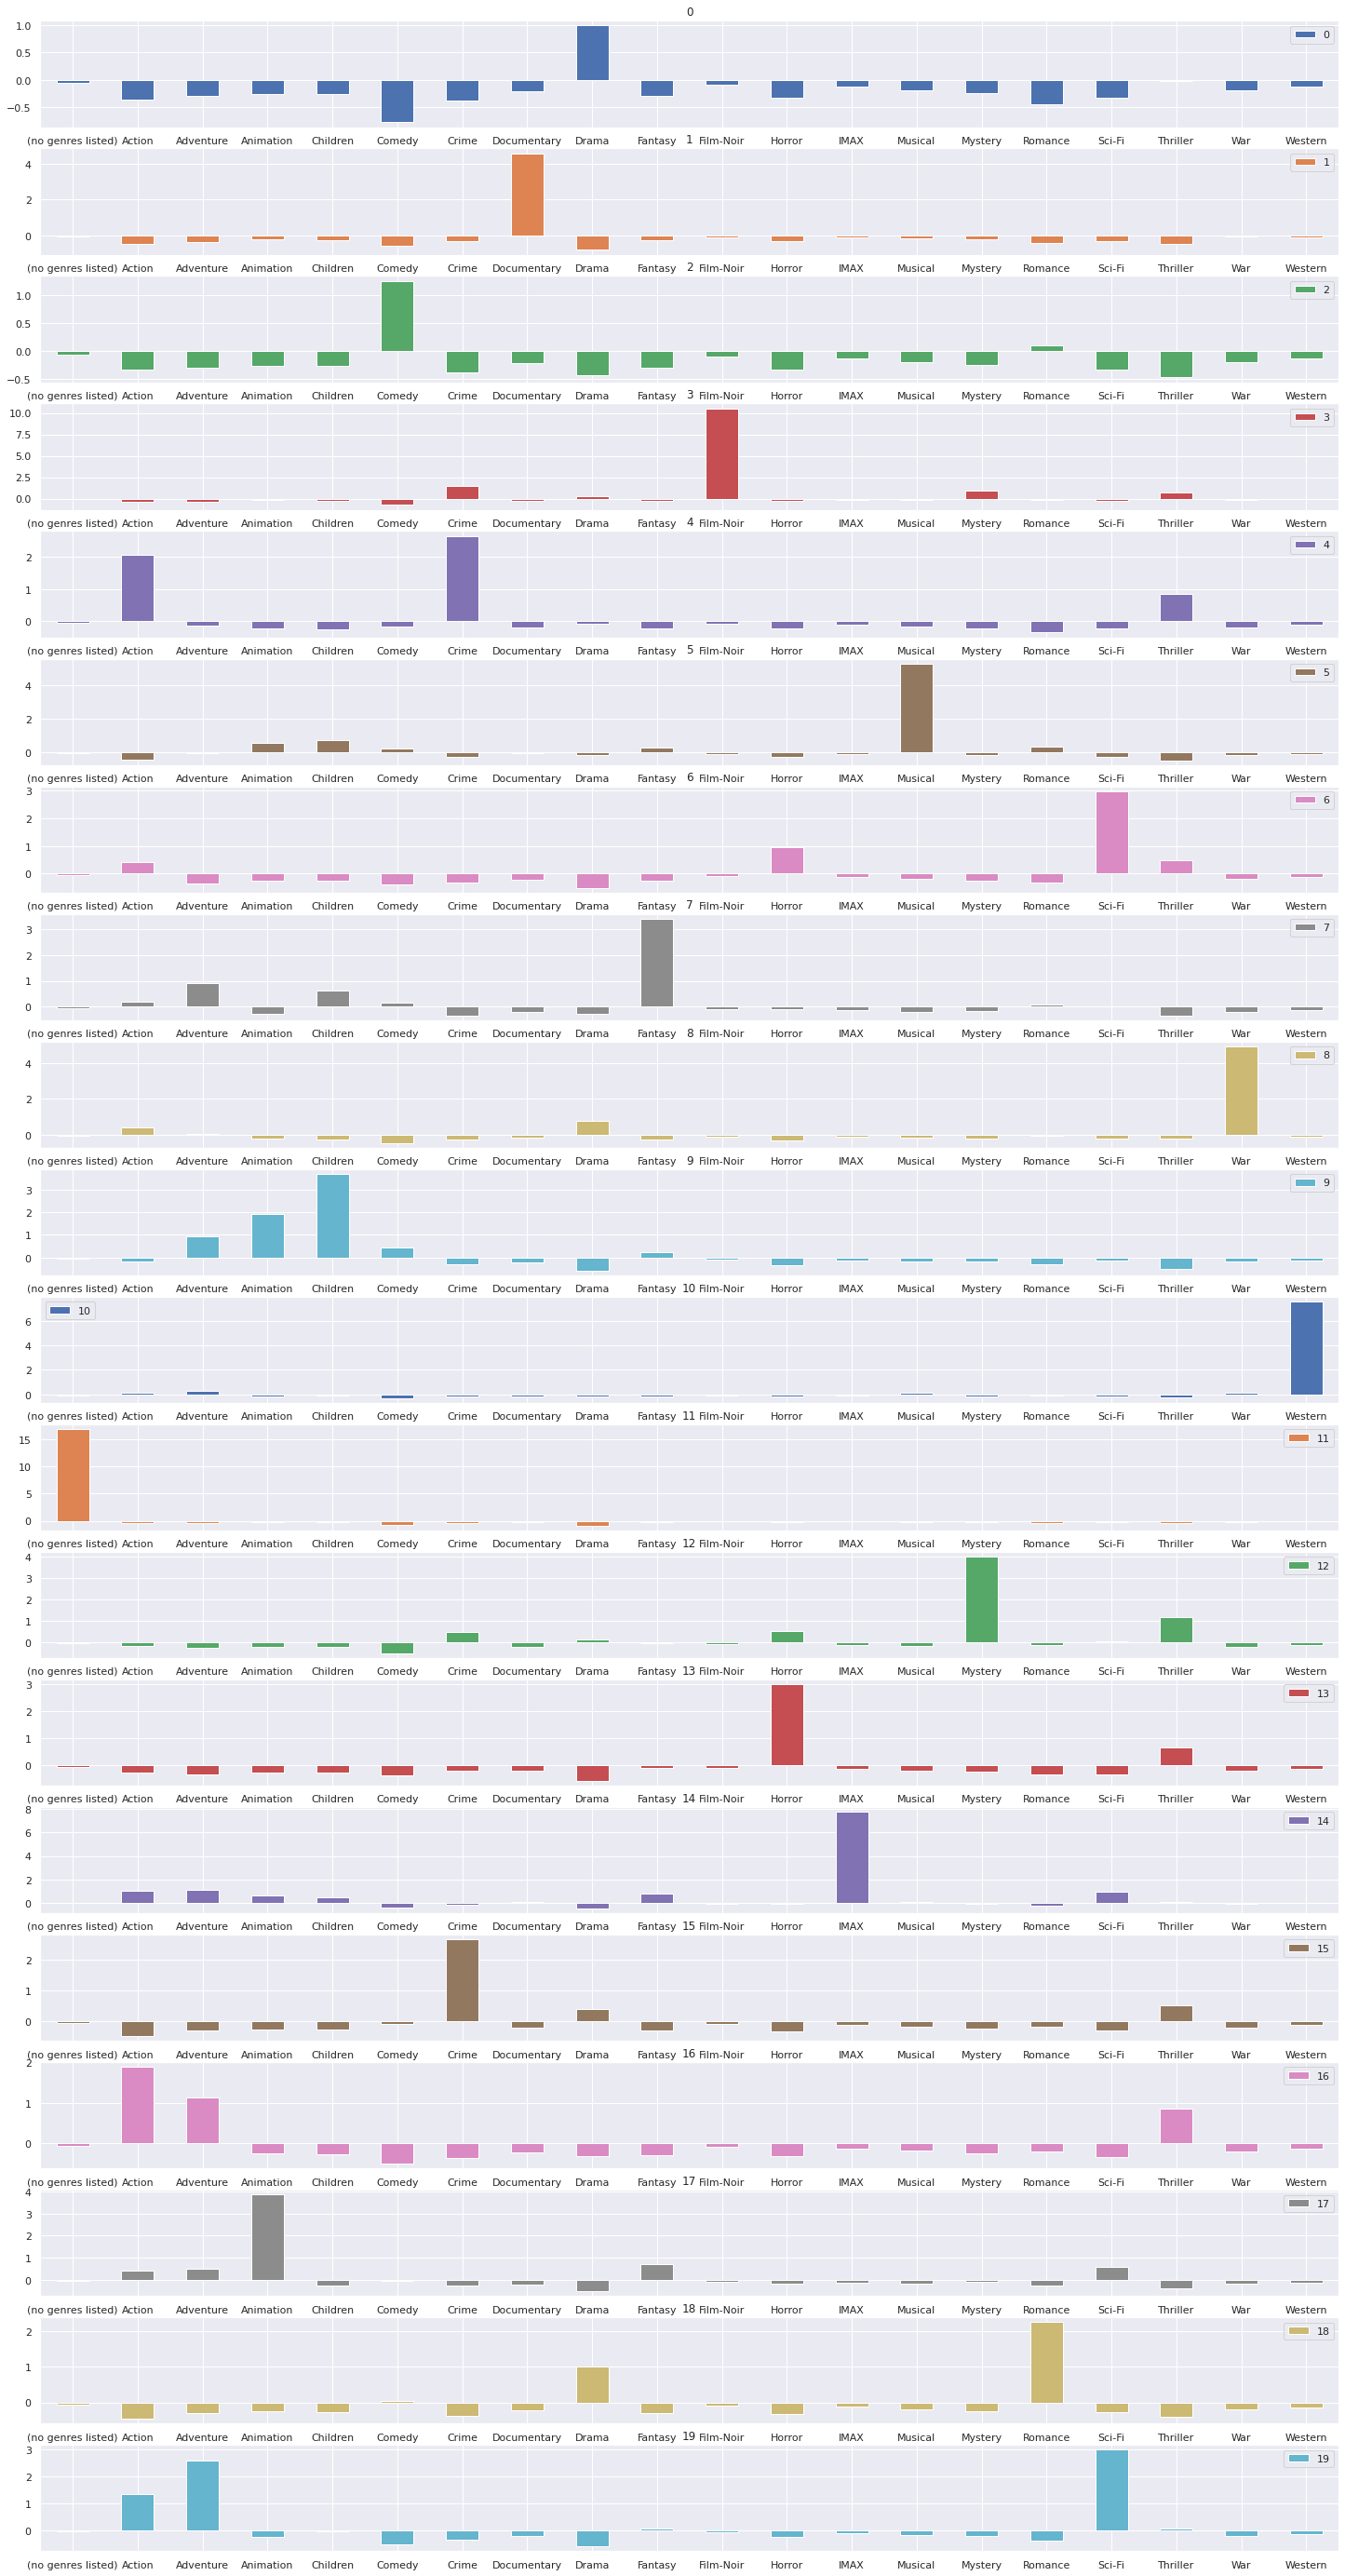

In [45]:
# rot é referente a rotação do da legenda
grupos_20.plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0);

Agora podemos ver que a separação foi muito mais criteriosa. Em alguns casos sobrou somente um genero por cluster.

Vamos verificar alguns clusters aleatórios:

In [50]:
# Aventuras infantis

grupo = 9
filtro = modelo_20.labels_ == grupo

filmes[filtro].sample(10)

,movieId,title,genres,labels_kmeans,20labels_kmeans
1510,2038,"Cat from Outer Space, The (1978)",Children|Comedy|Sci-Fi,1,9
9560,173351,Wow! A Talking Fish! (1983),Animation|Children|Comedy|Fantasy,1,9
642,828,"Adventures of Pinocchio, The (1996)",Adventure|Children,1,9
9621,177765,Coco (2017),Adventure|Animation|Children,1,9
5944,34321,Bad News Bears (2005),Children|Comedy,0,9
772,1014,Pollyanna (1960),Children|Comedy|Drama,0,9
1546,2082,"Mighty Ducks, The (1992)",Children|Comedy,0,9
5087,8015,"Phantom Tollbooth, The (1970)",Adventure|Animation|Children|Fantasy,1,9
8422,111146,Alpha and Omega 3: The Great Wolf Games (2014),Action|Adventure|Animation|Children|Comedy,1,9
7,8,Tom and Huck (1995),Adventure|Children,1,9


In [51]:
# Romances dramáticos

grupo = 18
filtro = modelo_20.labels_ == grupo

filmes[filtro].sample(10)

,movieId,title,genres,labels_kmeans,20labels_kmeans
2377,3155,Anna and the King (1999),Drama|Romance,0,18
1041,1353,"Mirror Has Two Faces, The (1996)",Comedy|Drama|Romance,0,18
8607,118166,Courier (1987),Comedy|Drama|Romance,0,18
5028,7826,"Secret Life of Walter Mitty, The (1947)",Comedy|Romance|Thriller,0,18
3445,4699,Original Sin (2001),Drama|Romance|Thriller,2,18
6078,41573,"Family Stone, The (2005)",Comedy|Drama|Romance,0,18
3215,4342,Big Eden (2000),Drama|Romance,0,18
9628,178615,Front Cover (2016),Comedy|Drama|Romance,0,18
882,1177,Enchanted April (1992),Drama|Romance,0,18
7259,74508,Persuasion (2007),Drama|Romance,0,18


Mas e agora? Quantos clusters devemos usar? 3? 20?

Quando utilizamos um grande número de clusters temos uma taxa de erro muito baixa, o que gera uma certa individualização no modelo. 

Se temos poucos clusters, temos uma taxa de erro muito alto, o que torna o modelo muito genérico

Vamos criar uma função que devolve o valor desse erro (`inertia`) para cada quantidade de clusters.

In [52]:
def kmeans_inertia(numero_clusters, df):
  modelo = KMeans(n_clusters=numero_clusters)
  modelo.fit(df)
  return [numero_clusters, modelo.inertia_]

In [53]:
kmeans_inertia(3, generos_escalados)

[3, 167801.11407948003]

In [54]:
kmeans_inertia(20, generos_escalados)

[20, 55243.80326374948]

Vamos plotar varias relações e tentar enxergar melhor o que está acontecendo:

In [56]:
resultados = [kmeans_inertia(i, generos_escalados) for i in range(1, 41)]
resultados

[[1, 194840.0],
 [2, 179664.9990790031],
 [3, 166185.0246690332],
 [4, 155968.069543132],
 [5, 146009.38593528833],
 [6, 136828.531162591],
 [7, 128380.2684771337],
 [8, 119806.89337173711],
 [9, 111973.25455555409],
 [10, 102528.99270344138],
 [11, 94690.50031760248],
 [12, 86418.2882281207],
 [13, 80696.31916155118],
 [14, 73819.75135464584],
 [15, 69219.99763110255],
 [16, 63608.52134969398],
 [17, 61887.0845984968],
 [18, 59139.68391620714],
 [19, 56400.88273815774],
 [20, 55022.38480927417],
 [21, 54675.657346806605],
 [22, 52594.3176739992],
 [23, 51147.71698121621],
 [24, 49843.87051595075],
 [25, 48620.49757380967],
 [26, 46558.60813463866],
 [27, 46241.12190965175],
 [28, 44102.693106120474],
 [29, 43447.48103878986],
 [30, 42928.90107295937],
 [31, 41916.01959011746],
 [32, 41086.33579226295],
 [33, 40221.039013037574],
 [34, 38755.113062854005],
 [35, 38295.87838024292],
 [36, 37282.249493734176],
 [37, 36732.909193867454],
 [38, 36050.540852280974],
 [39, 36070.839253477934

In [67]:
resultados_df = pd.DataFrame(resultados, columns=['N_clusters','inertia'])
resultados_df

,N_clusters,inertia
0,1,194840.000000
1,2,179664.999079
2,3,166185.024669
3,4,155968.069543
4,5,146009.385935
5,6,136828.531163
6,7,128380.268477
7,8,119806.893372
8,9,111973.254556
9,10,102528.992703


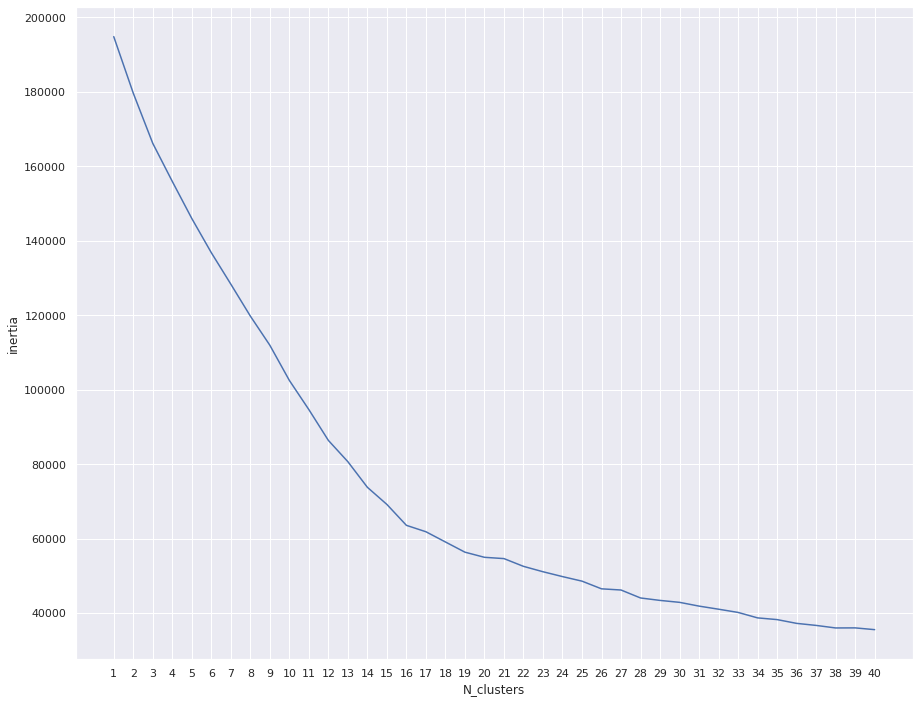

In [76]:
ax = sns.lineplot(x = resultados_df.N_clusters, y=resultados_df.inertia)
plt.xticks(resultados_df.N_clusters)
ax.figure.set_size_inches(15,12);


Olhando o gráfico acima e utilizando o `Método do cotovelo`, podemos saber facilmente qual o valor ideal.

É só achar qual o cotovelo do gráfico. Olhando acima, vemos bem que é o número 16

Agora que sabemos qual o número ideal de clusters, mãos a obra:

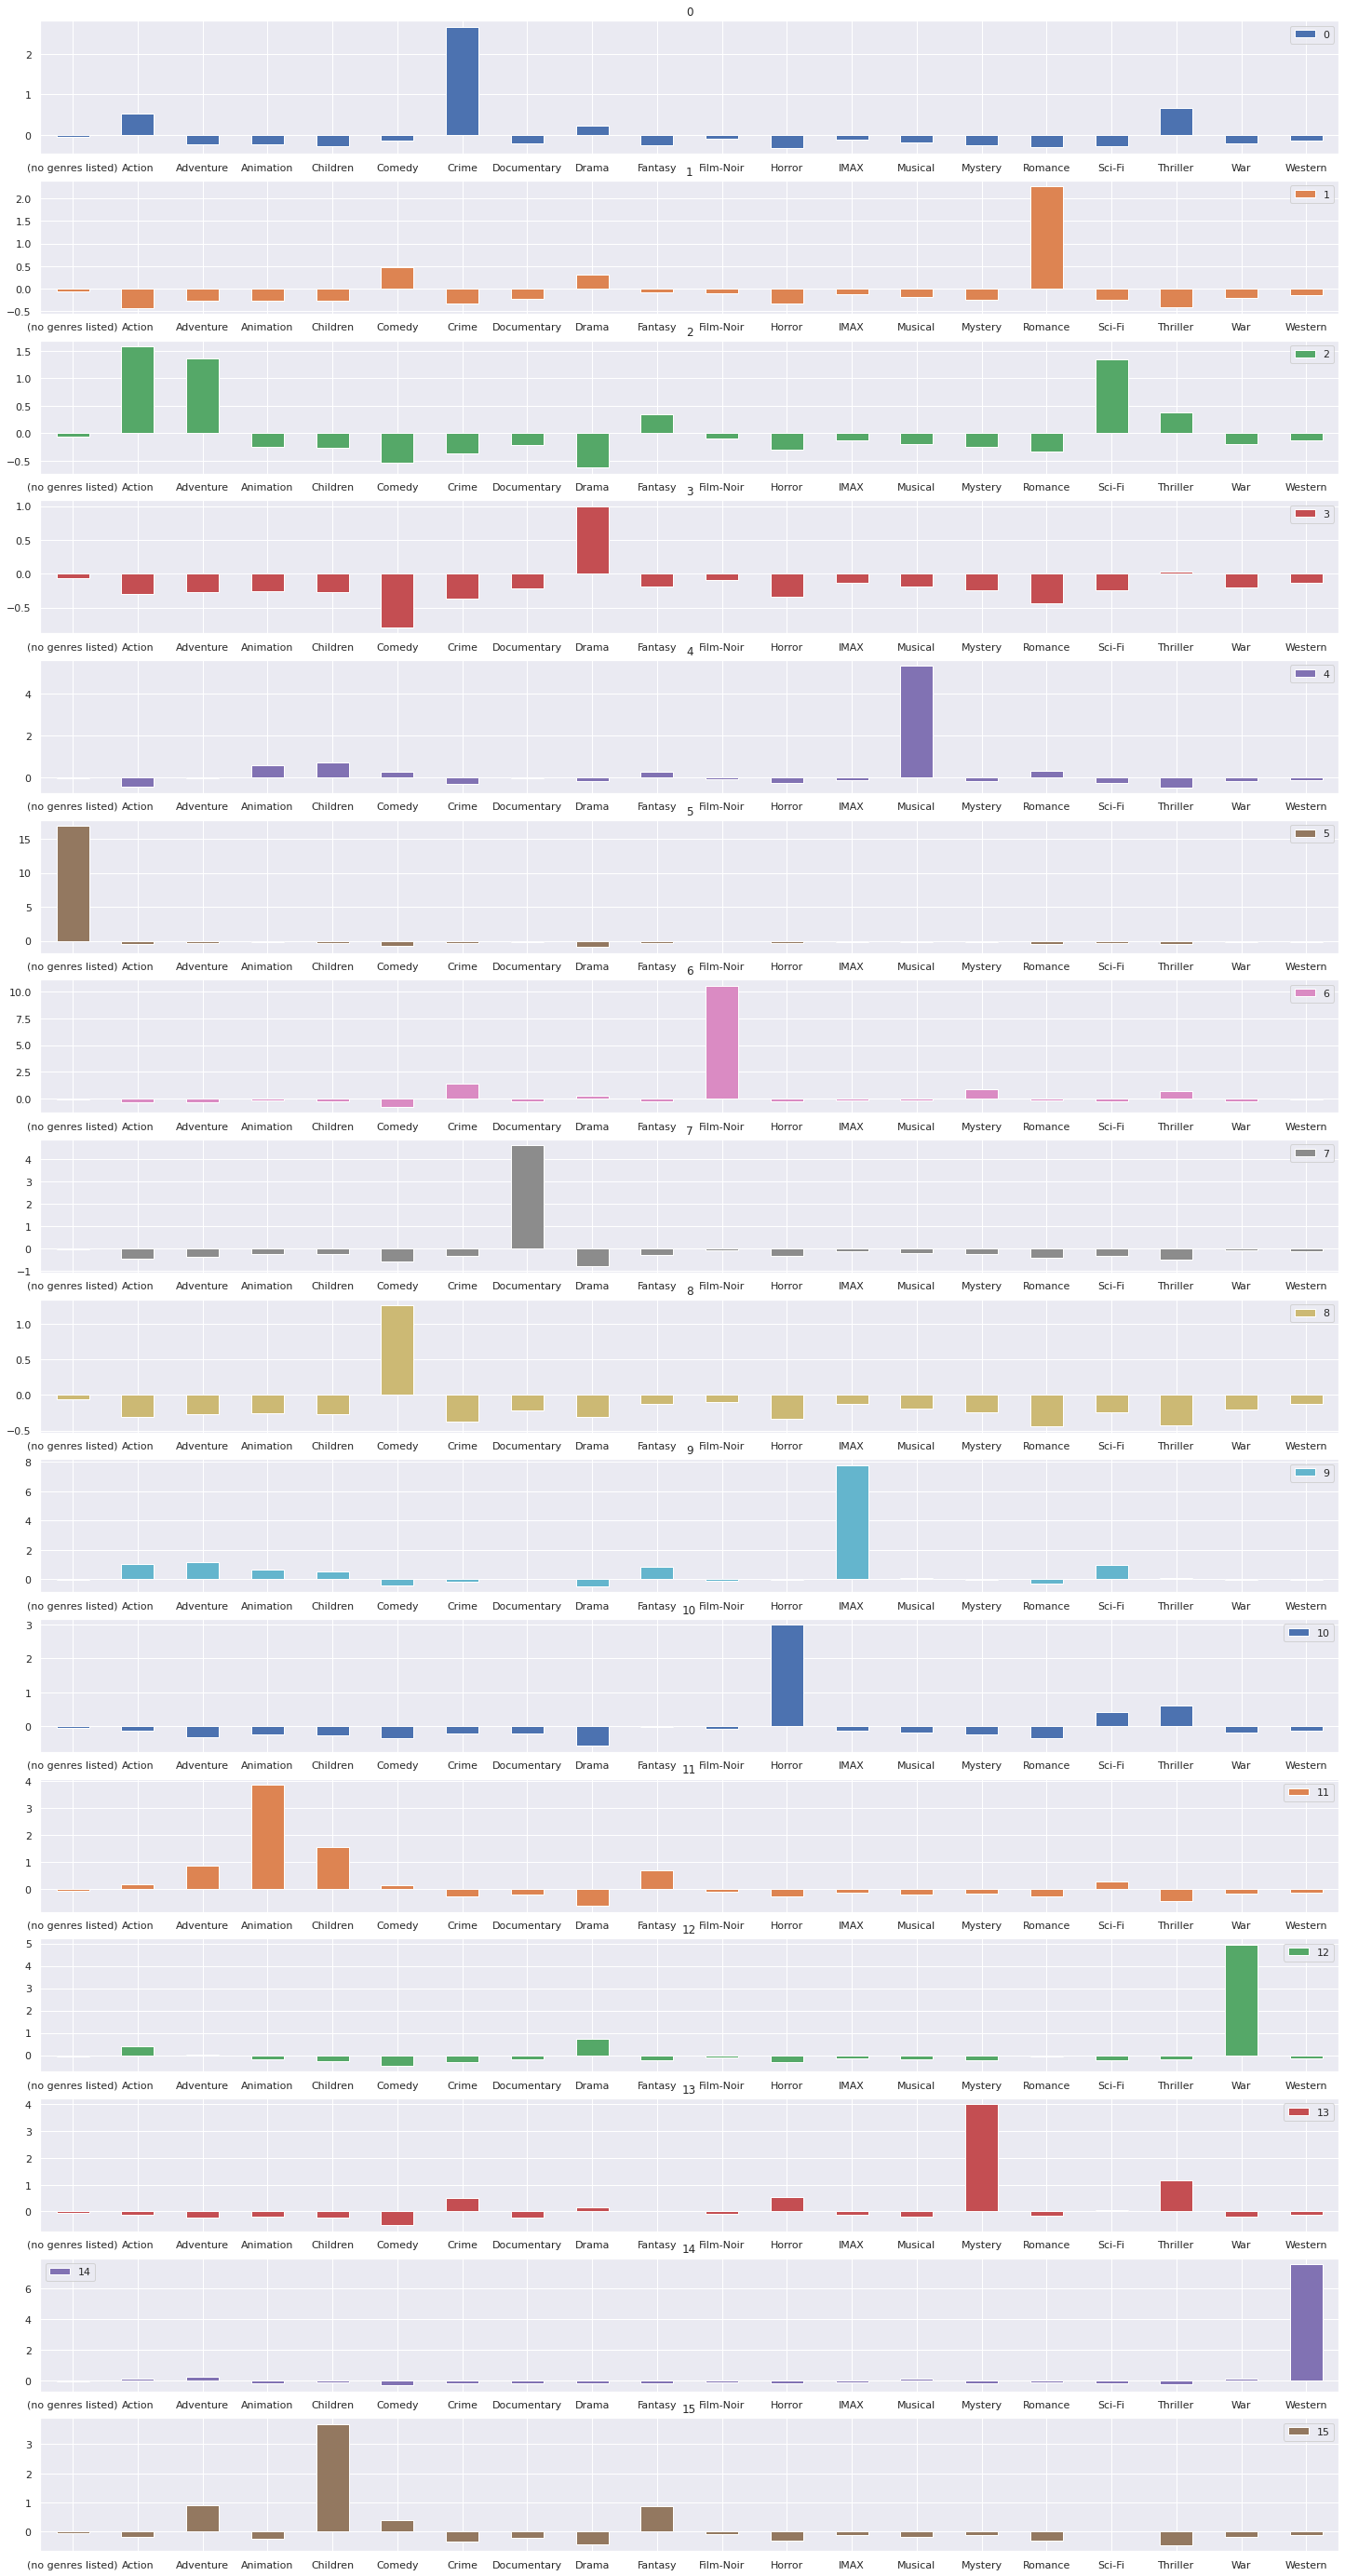

In [81]:
modelo_16 = KMeans(n_clusters=16, random_state=42)

modelo_16.fit(generos_escalados)

grupos_16 = pd.DataFrame(modelo_16.cluster_centers_, columns=genres.columns)
grupos_16 = grupos_16.transpose()

grupos_16.plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0);

Agora que temos um modelo ideal de clusters para nosso modelo, vamos começar o observar qual a relação entre eles

## Agglomerative Clustering

Até agora, estavamos utilizando o KMeans, que trabalha gerando os clusters de uma forma simultânea. No Kmeans, estamos buscando uma comparação entre os dados.

Agora vamos trabalhar com o Agglomerative Clustering. Esse algoritimo trabalha de uma forma sequencial. Ele gera clusters após cluster criando uma certa relação entre eles (qual se parece mais com qual), conforme vemos abaixo:

<center><img src='https://cdn-images-1.medium.com/max/800/1*ET8kCcPpr893vNZFs8j4xg.gif'></center>

In [82]:
from sklearn.cluster import AgglomerativeClustering

In [89]:
modelo_AC = AgglomerativeClustering(n_clusters=16)
grupos_AC = modelo_AC.fit_predict(generos_escalados)
grupos_AC

array([ 5, 14, 13, ...,  0,  5,  0])

In [94]:
modelo_AC.labels_

array([ 5, 14, 13, ...,  0,  5,  0])

In [91]:
tsne = TSNE()
visualizacao_AC = tsne.fit_transform(generos_escalados)
visualizacao_AC

array([[ 23.686037 , -63.13825  ],
       [-78.864174 ,   4.4697466],
       [ 16.552002 , -22.48417  ],
       ...,
       [  1.1212488,  25.275568 ],
       [ 27.314817 , -43.547974 ],
       [-12.412053 , -11.296008 ]], dtype=float32)

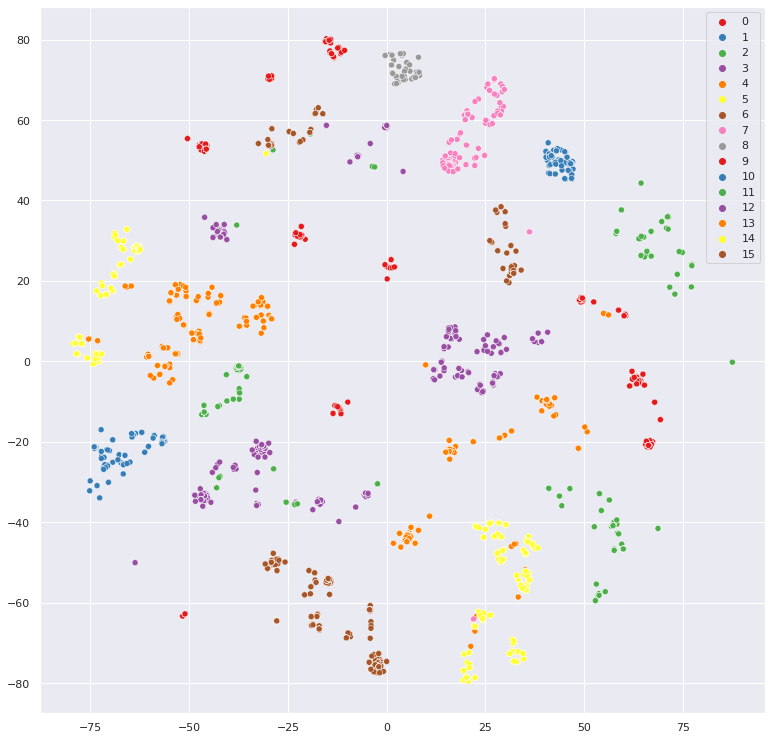

In [95]:
ax = sns.scatterplot(x=visualizacao_AC[:,0], y=visualizacao_AC[:,1], hue=modelo_AC.labels_, palette=('Set1'))
ax.figure.set_size_inches(13, 13)

### Dendograma

Para finalizar esse estudo, vamos plotar um Dendograma.

Dendograma é o nome que damos ao gráfico que nos exibe essas relações e proximidades entre os grupos.

In [96]:
from scipy.cluster.hierarchy import linkage, dendrogram

# o linkage é para gerar as ligações entre os clusters

Antes vamos plotar nosso gráfico padrão com o peso de cada genero dentro do cluster para podermos comparar e entendermos melhor quais foram as relações criadas no dendograma

*Por questões de visualizações e limitações de parâmetros do Agglomerative Clustering (não temos nele, alguns parâmentro que vinhamos utilizando para exibir nossos plots como `cluster_centers_`*

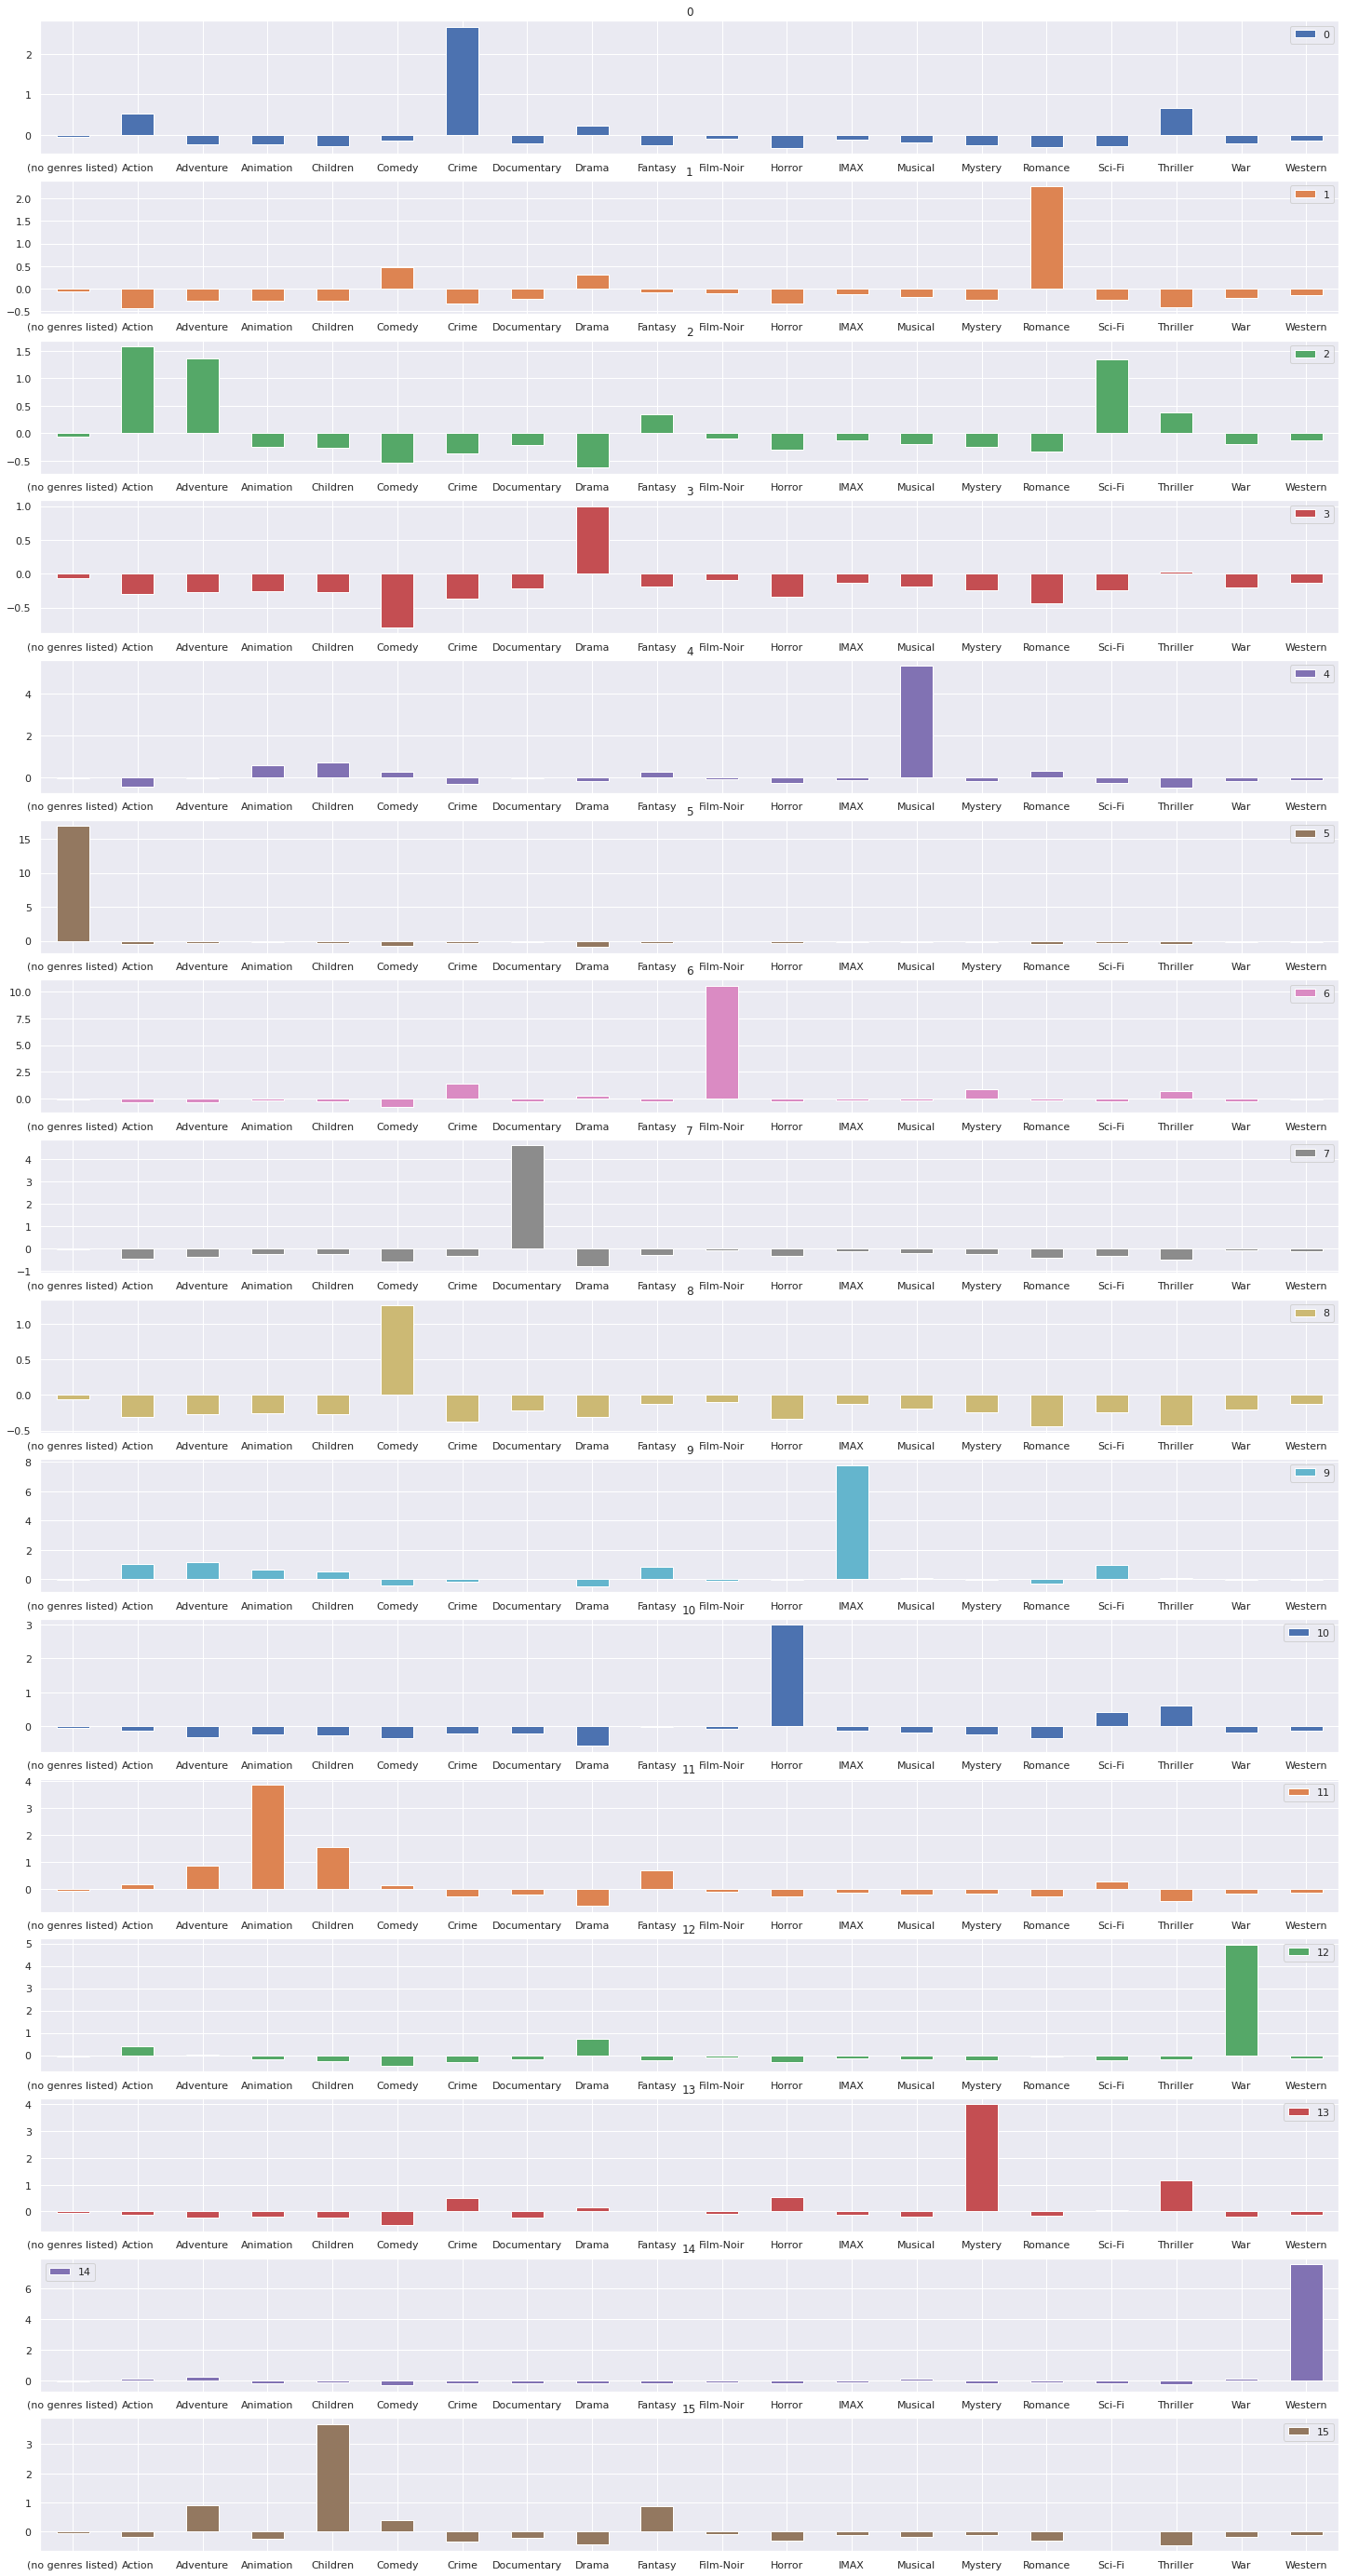

In [100]:
grupos_16.plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0);

In [102]:
matriz_de_distancia = linkage(grupos_16)
matriz_de_distancia

array([[ 1.        , 16.        ,  1.3089676 ,  2.        ],
       [ 2.        ,  9.        ,  1.31929027,  2.        ],
       [20.        , 21.        ,  1.45738031,  4.        ],
       [17.        , 22.        ,  2.39217086,  5.        ],
       [ 5.        , 23.        ,  2.55687115,  6.        ],
       [ 6.        , 24.        ,  2.57797378,  7.        ],
       [ 8.        , 25.        ,  2.63356578,  8.        ],
       [15.        , 26.        ,  2.79411379,  9.        ],
       [11.        , 27.        ,  2.96534762, 10.        ],
       [ 4.        , 28.        ,  3.10282777, 11.        ],
       [14.        , 29.        ,  3.25801643, 12.        ],
       [ 3.        , 30.        ,  3.45170086, 13.        ],
       [18.        , 31.        ,  4.66450178, 14.        ],
       [ 7.        , 32.        ,  5.18747871, 15.        ],
       [13.        , 33.        ,  5.32099766, 16.        ],
       [12.        , 34.        ,  7.01315039, 17.        ],
       [19.        , 35.

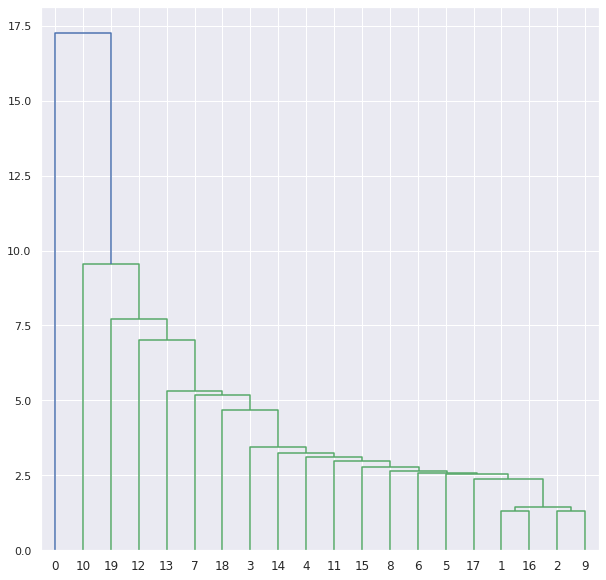

In [107]:
fig = plt.figure(figsize=(10,10))
ax = dendrogram(matriz_de_distancia)


E aqui, por fim, podemos observar como os generos se relacionam segundo nosso modelo do KMeans.

Isso é muito importante pois pode nos ajudar para criação de um modelo para sistemas de recomendação. Por exemplo: uma pessoa que assistiu um filme da categoria 9, pode gostar de um filme da categoria 2.